In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('all_data.csv')

In [3]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
df.tail()

,Country,Year,Life expectancy at birth (years),GDP
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10
95,Zimbabwe,2015,60.7,1.630467e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [6]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [7]:
df.shape

(96, 4)

In [8]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [9]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [10]:
df = df.rename({"Life expectancy at birth (years)":"LEBY"}, axis = "columns")

In [11]:
df.head()

,Country,Year,LEBY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


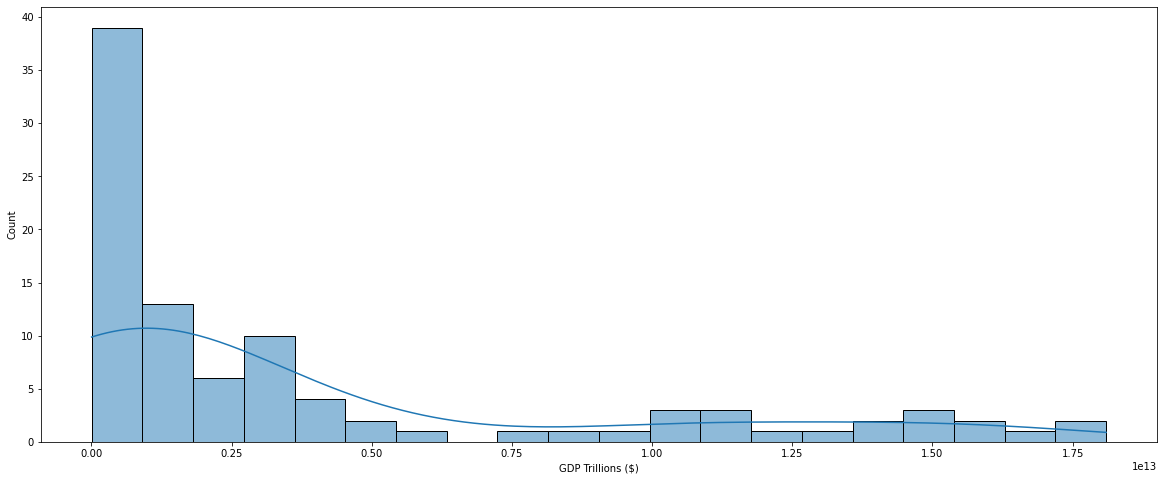

In [12]:
plt.figure(figsize = (20, 8))
sns.histplot(df.GDP, bins = 20, kde = True)
plt.xlabel('GDP Trillions ($)')
plt.show()

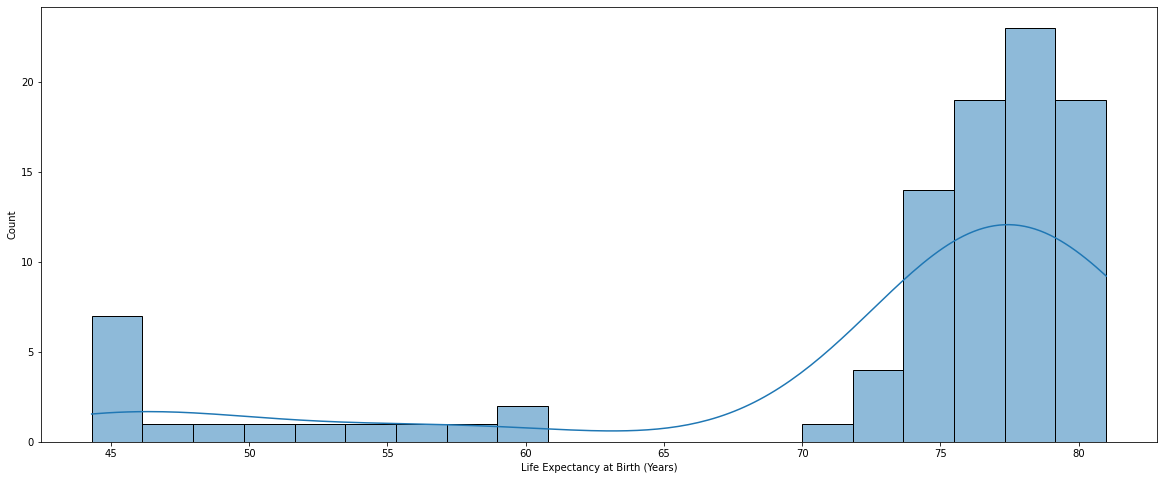

In [13]:
plt.figure(figsize = (20, 8))
sns.histplot(df.LEBY, bins = 20, kde = True)
plt.xlabel('Life Expectancy at Birth (Years)')
plt.show()

# Summary 1
##### The GDP plot was heavily skewed right however the Life Expectancy at Birth plot above has data which is skewed left.

In [14]:
df_mean = df.drop('Year', axis = 1).groupby('Country').mean().reset_index()

In [15]:
df_mean.head(6)

,Country,LEBY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


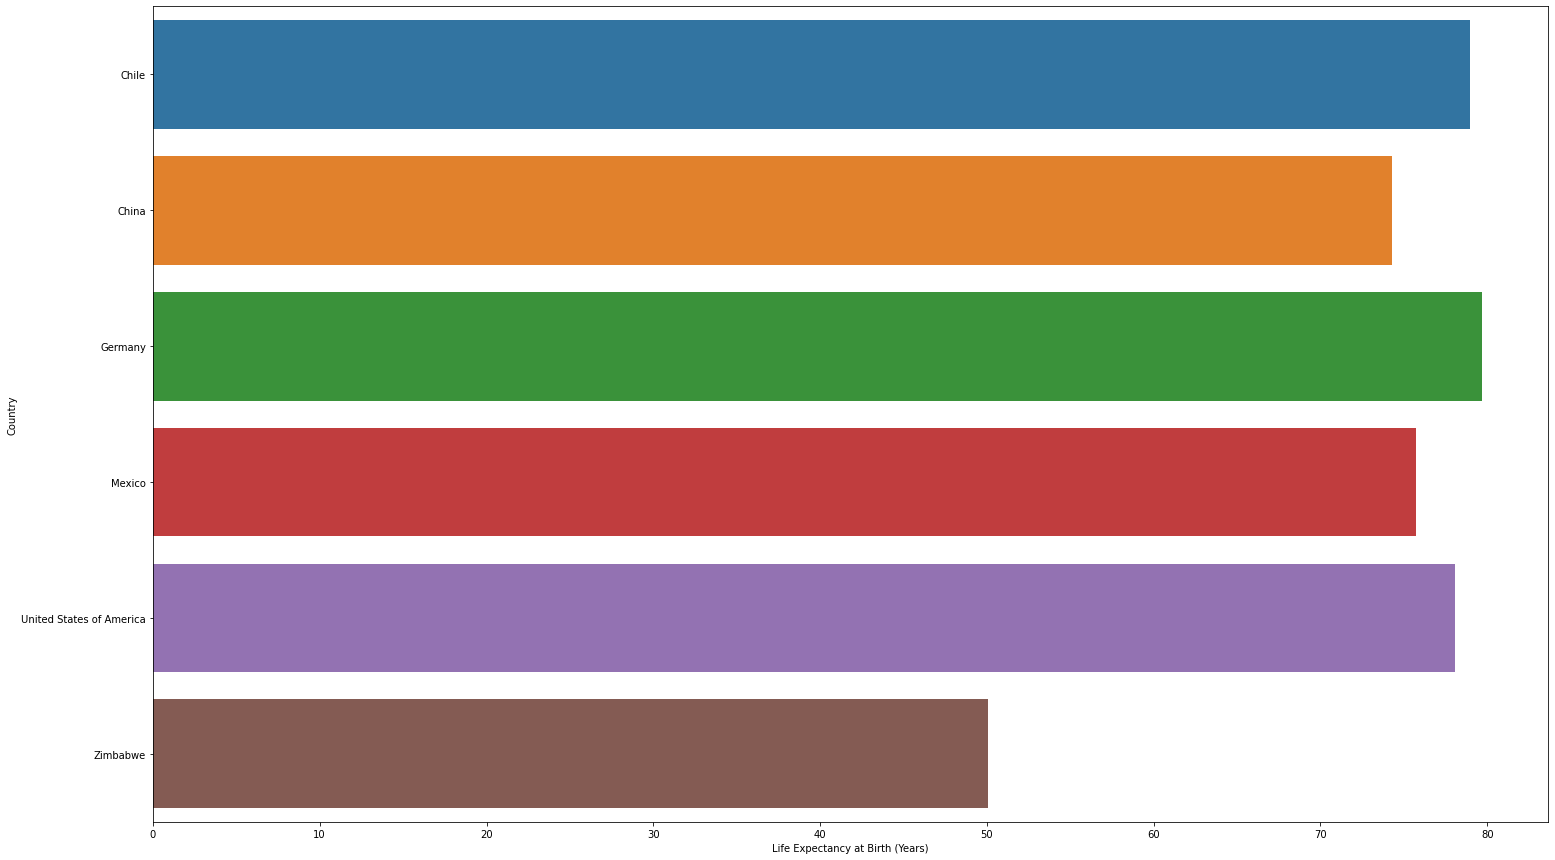

In [16]:
plt.figure(figsize = (25, 15))
sns.barplot(data = df_mean, x = 'LEBY', y = 'Country')
plt.xlabel('Life Expectancy at Birth (Years)')
plt.savefig('Bar Plot Life Expectancy at Birth in Years')
plt.show()

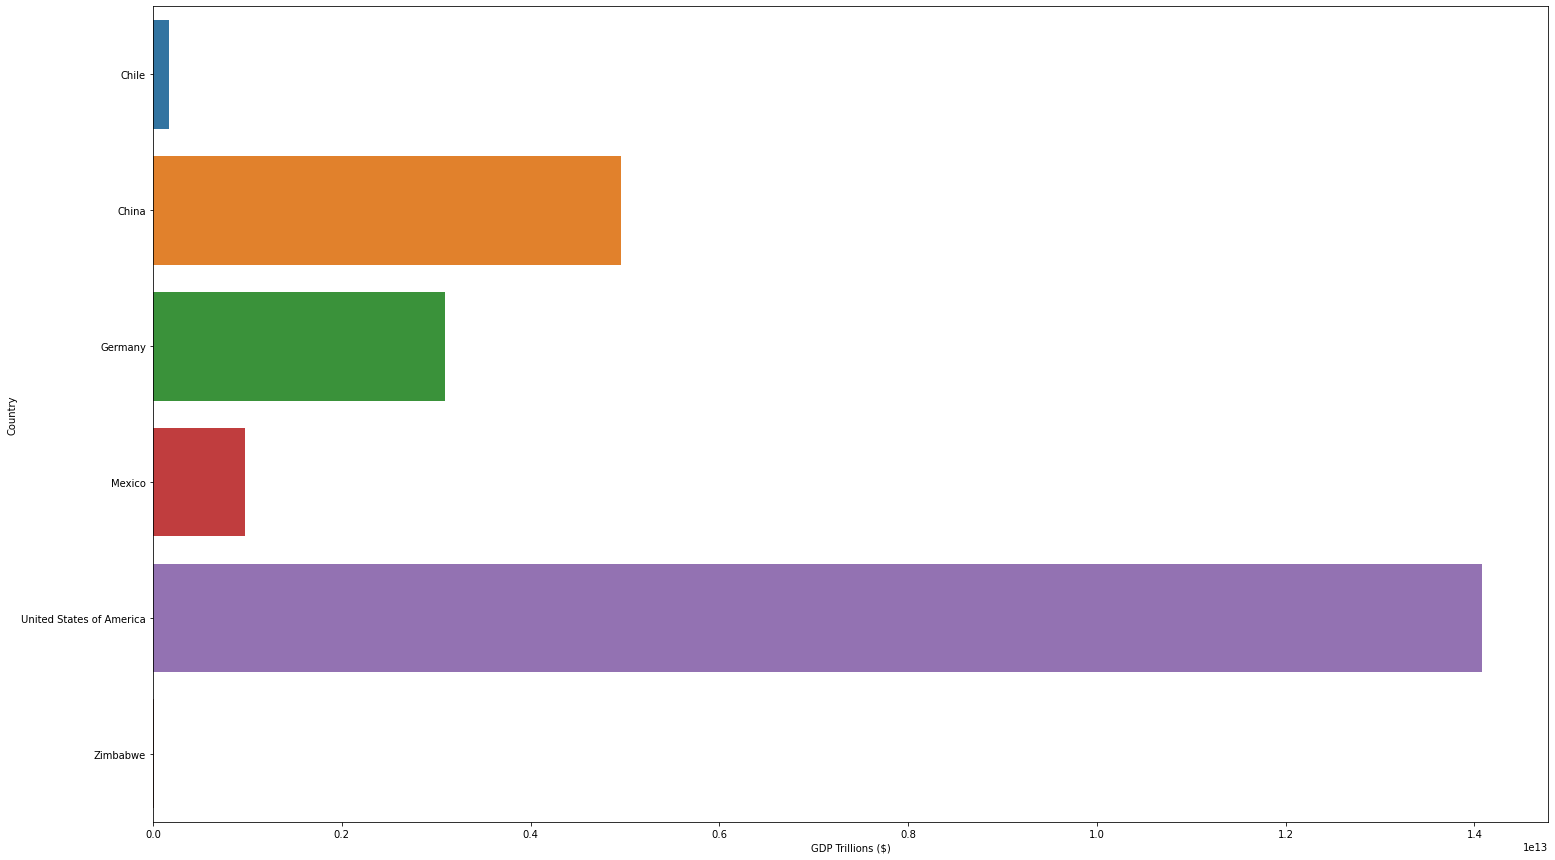

In [17]:
plt.figure(figsize = (25, 15))
sns.barplot(data = df_mean, x = 'GDP', y = 'Country')
plt.xlabel('GDP Trillions ($)')
plt.savefig('Bar Plot GDP in Trillion Dollars ($)')
plt.show()

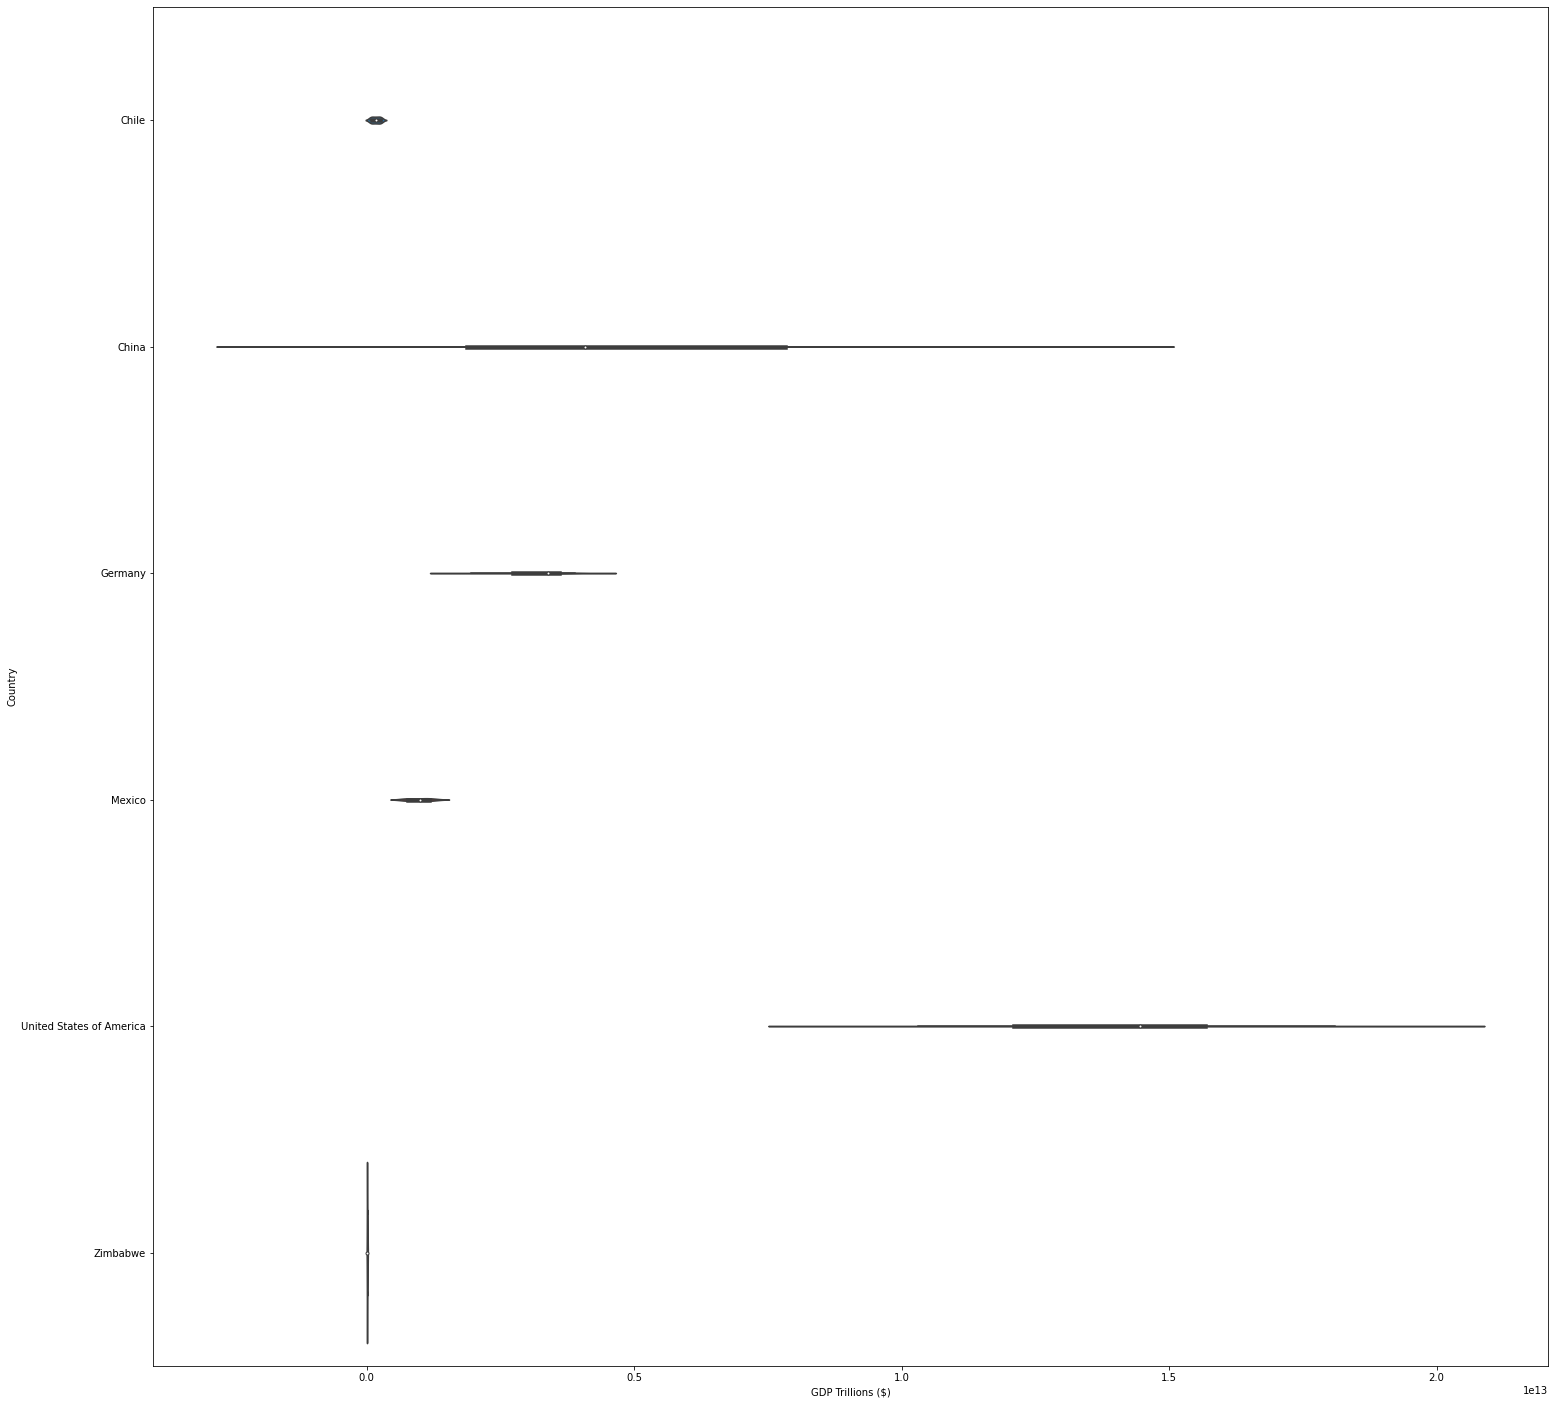

In [18]:
plt.figure(figsize = (25, 25))
sns.violinplot(data = df, x = 'GDP', y = 'Country')
plt.xlabel('GDP Trillions ($)')
plt.show()

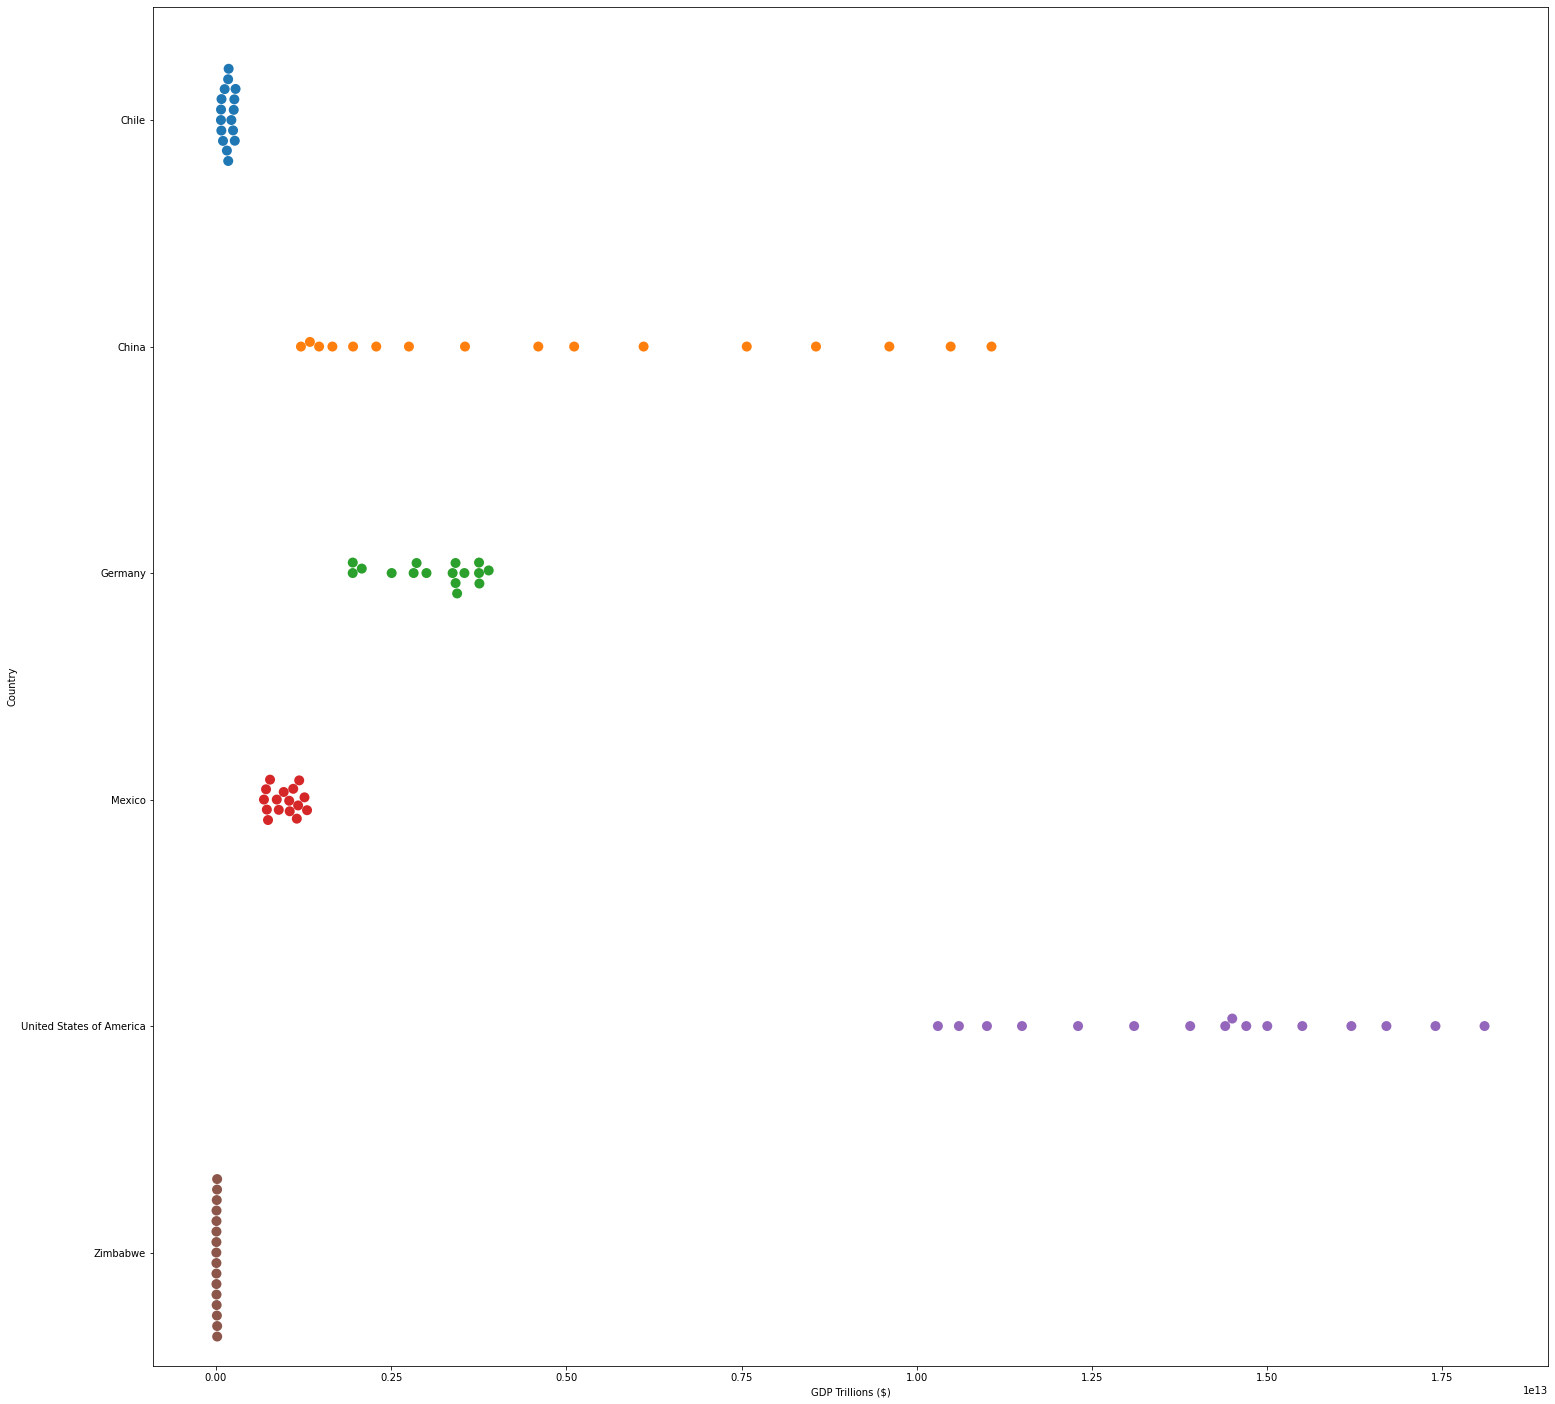

In [19]:
plt.figure(figsize = (25, 25))
sns.swarmplot(data = df, x = 'GDP', y = 'Country', size = 10)
plt.xlabel('GDP Trillions ($)')
plt.show()

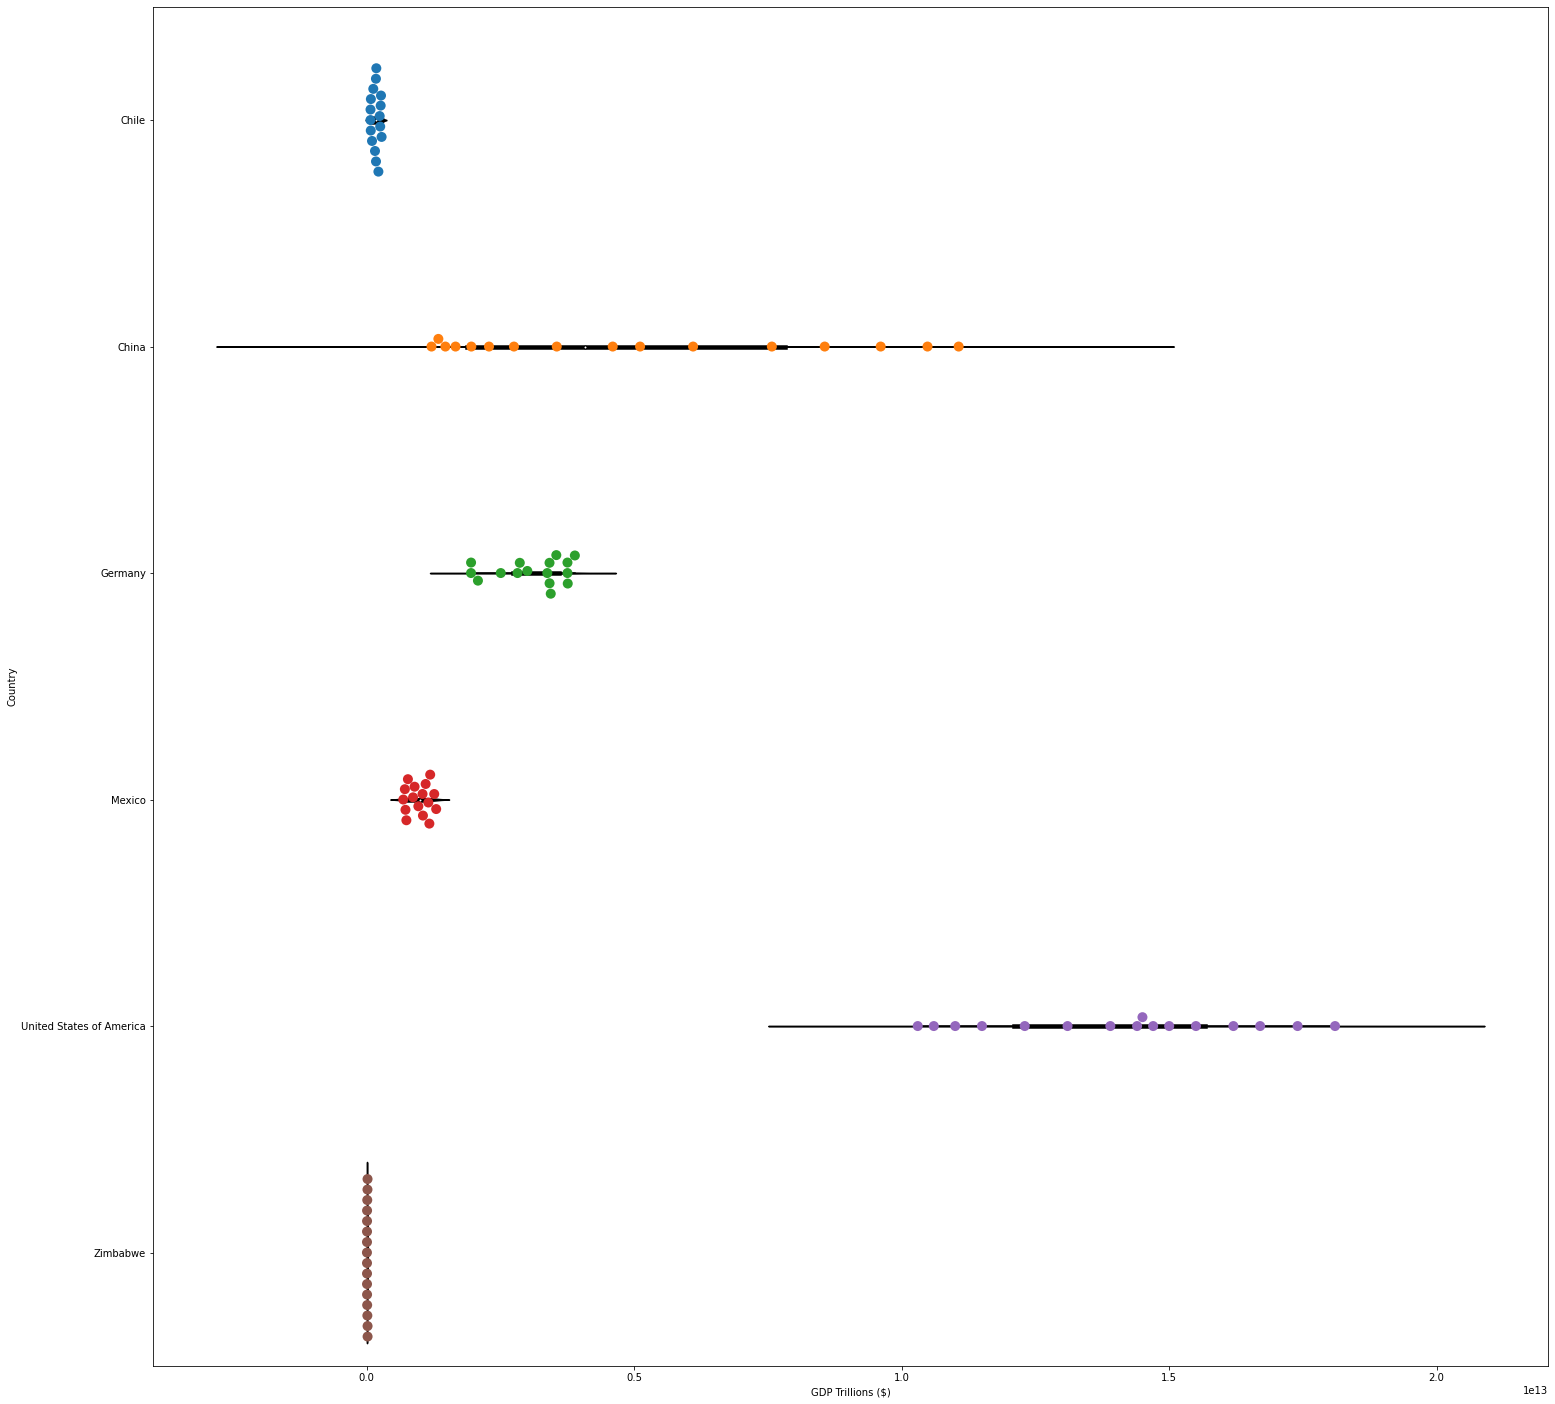

In [25]:
plt.figure(figsize = (25, 25))
sns.violinplot(data = df, x = 'GDP', y = 'Country', color = 'black')
sns.swarmplot(data = df, x = 'GDP', y = 'Country', size = 10)
plt.xlabel('GDP Trillions ($)')
plt.savefig('ViolinSwarmPlot GDP in Trillion Dollars ($)')
plt.show()

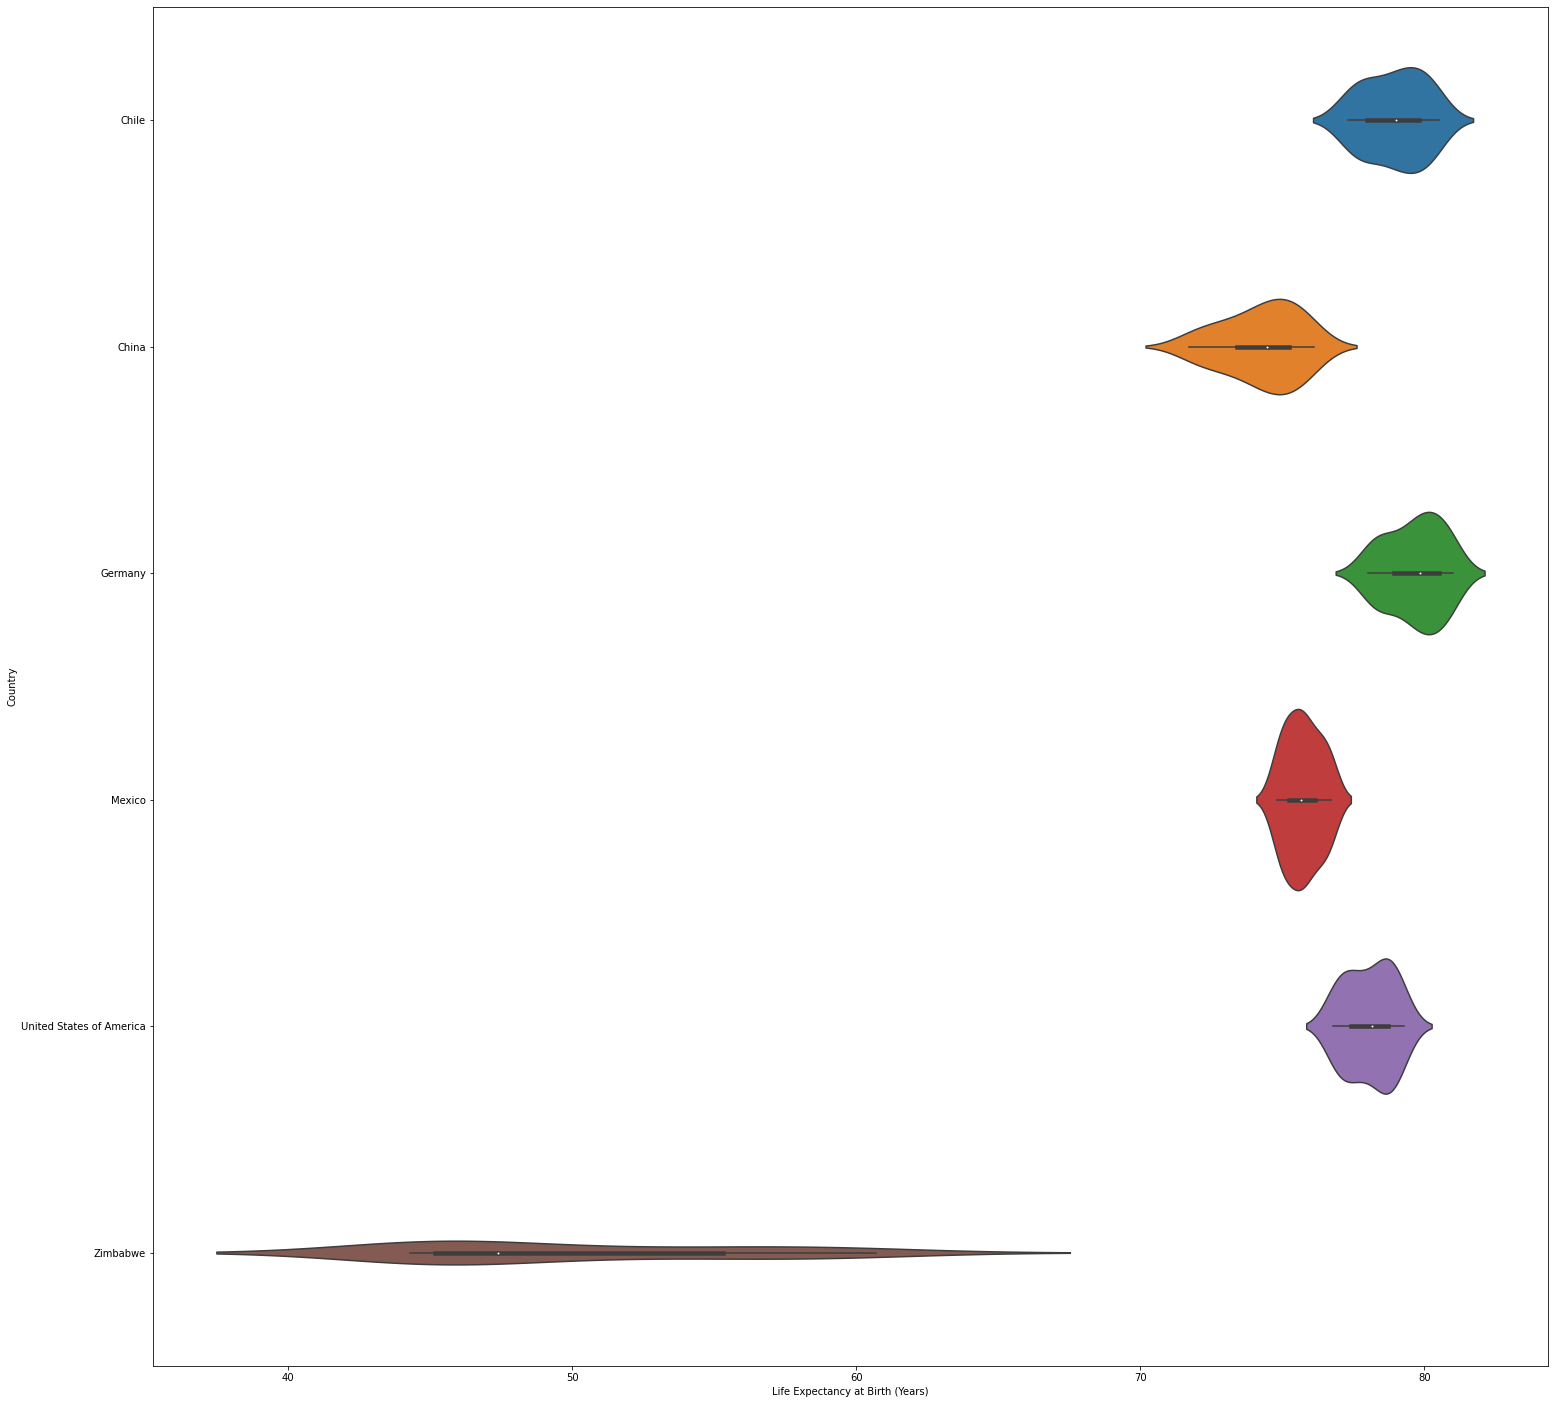

In [21]:
plt.figure(figsize = (25, 25))
sns.violinplot(data = df, x = 'LEBY', y = 'Country')
plt.xlabel('Life Expectancy at Birth (Years)')
plt.show()

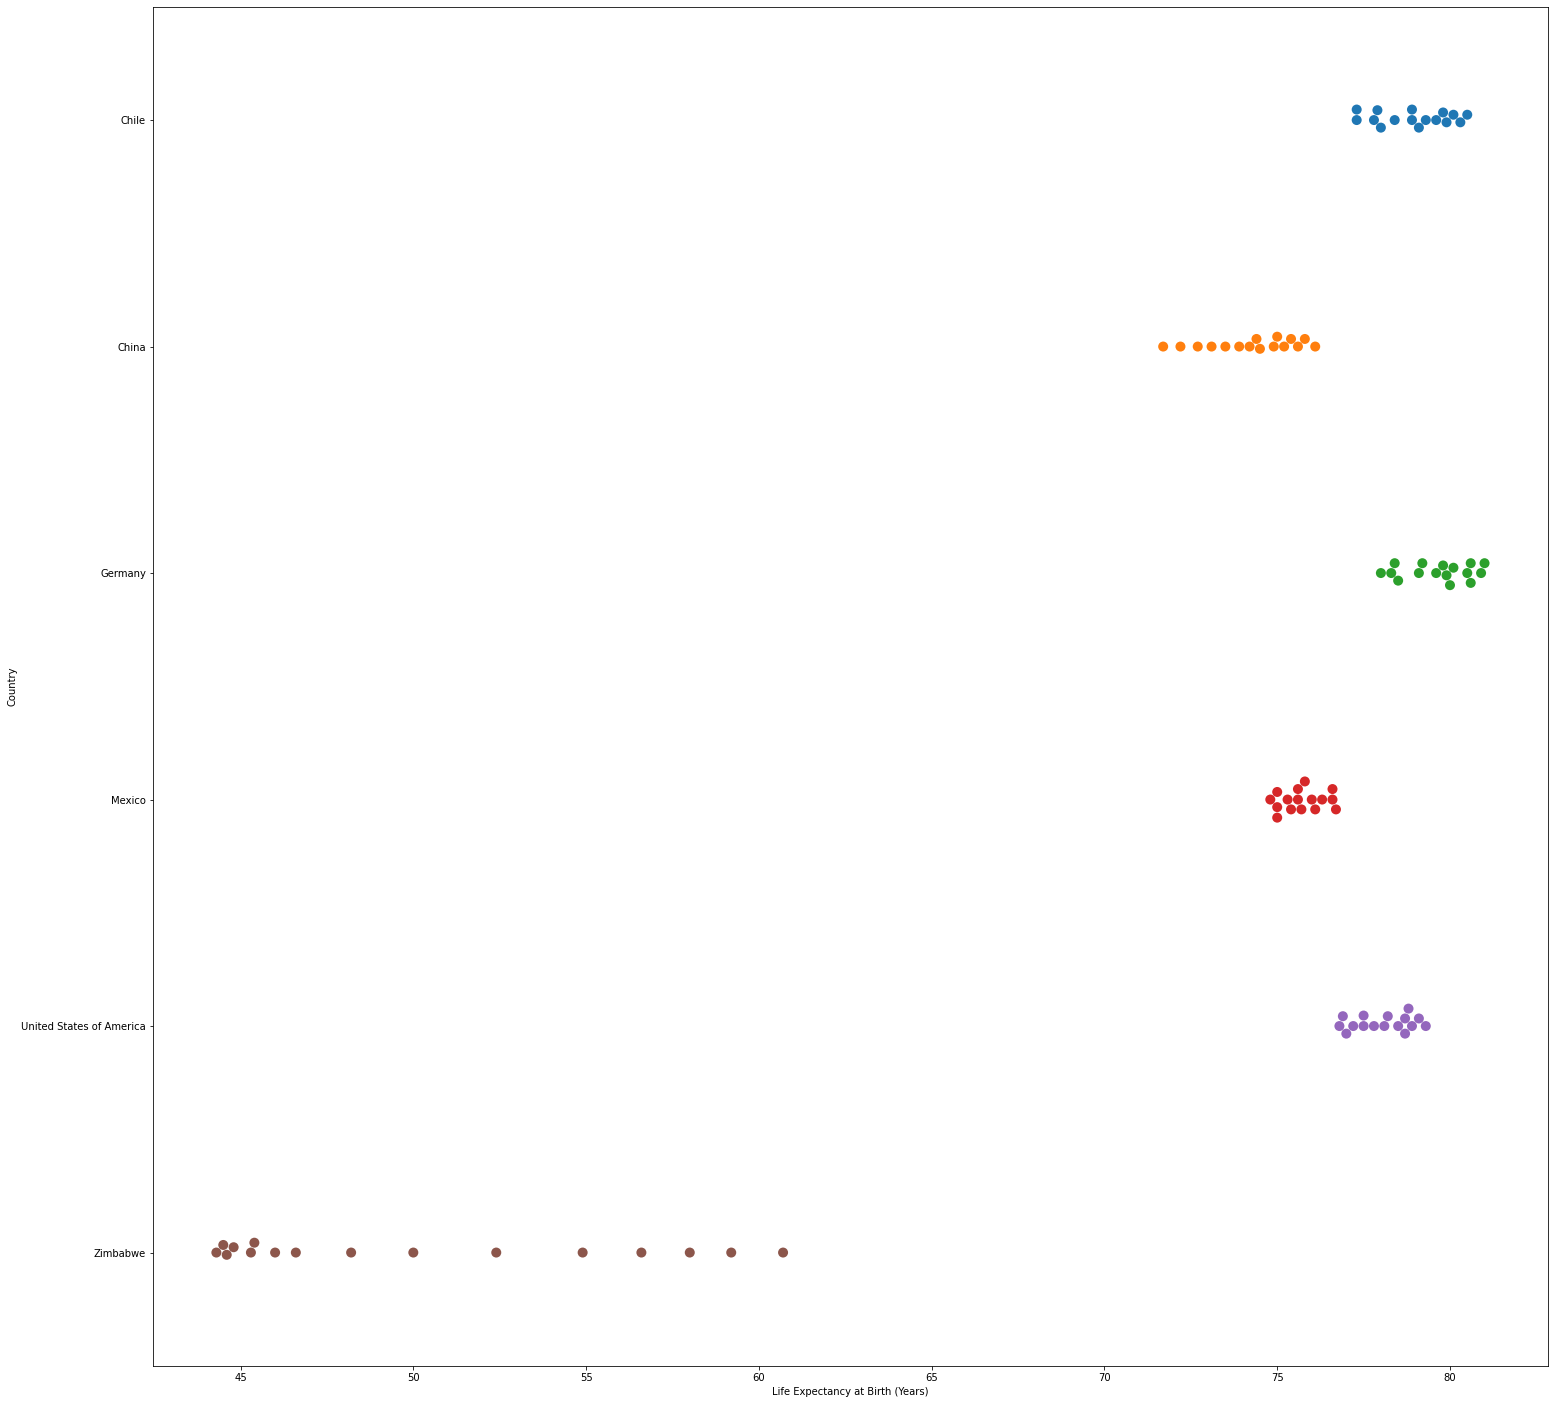

In [22]:
plt.figure(figsize = (25, 25))
sns.swarmplot(data = df, x = 'LEBY', y = 'Country', size = 10)
plt.xlabel('Life Expectancy at Birth (Years)')
plt.show()

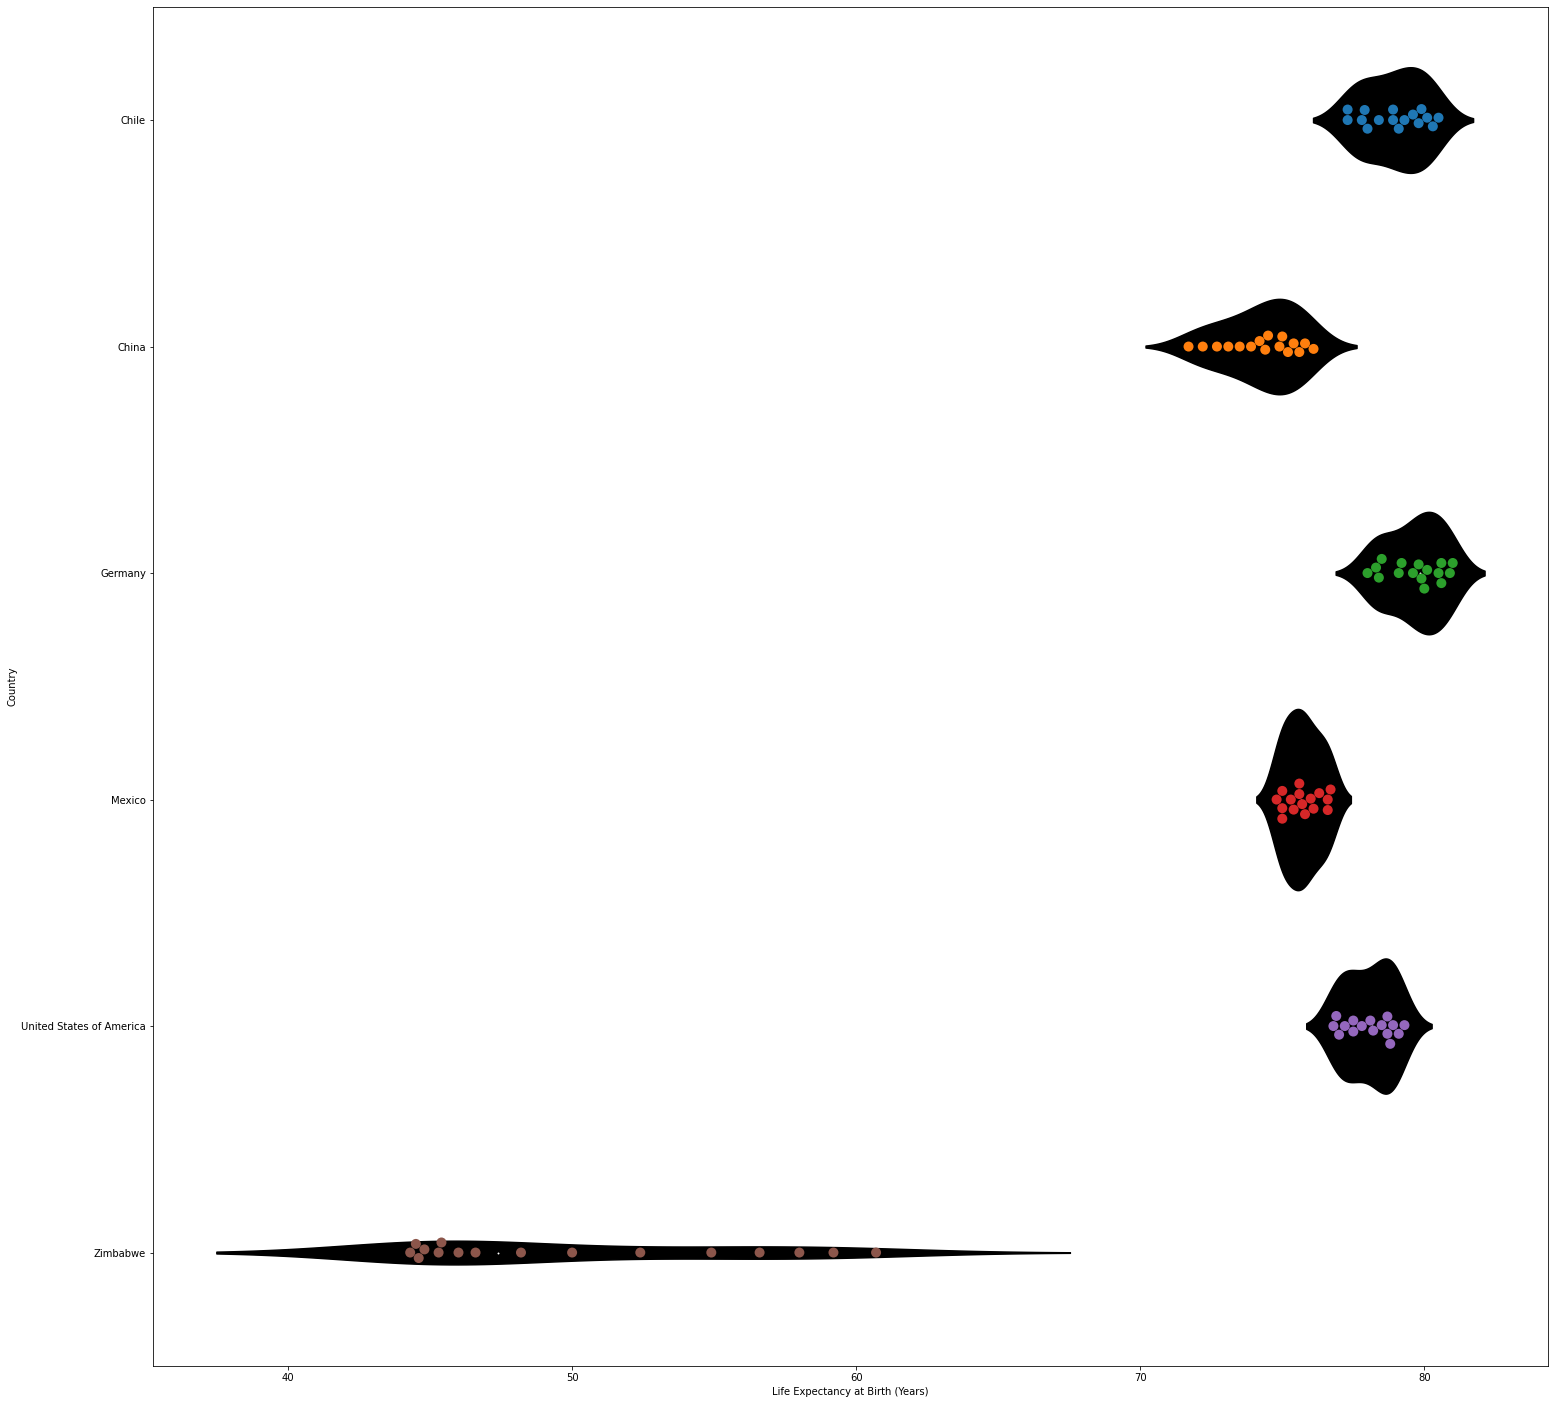

In [24]:
plt.figure(figsize = (25, 25))
sns.violinplot(data = df, x = 'LEBY', y = 'Country', color = 'black')
sns.swarmplot(data = df, x = 'LEBY', y = 'Country', size = 10)
plt.xlabel('Life Expectancy at Birth (Years)')
plt.savefig('ViolinSwarmPlot Life Expectancy at Birth in Years')
plt.show()

# Summary 2
##### The previous plots have highlighted some interesting observations. The first thing I notice is that China have increased GDP quite significantly and further analysis will be performed on the 'Year' column to highlight some further observations on this. USA have further increased GDP but Zimbabwe and Chile did not increase GDP of any significance. In relation to the Life Expectancy at Birth plots the biggest increase is in Zimbabwe but once more further analysis needs to be performed on the 'Year' column to indicate if this increase was time related.

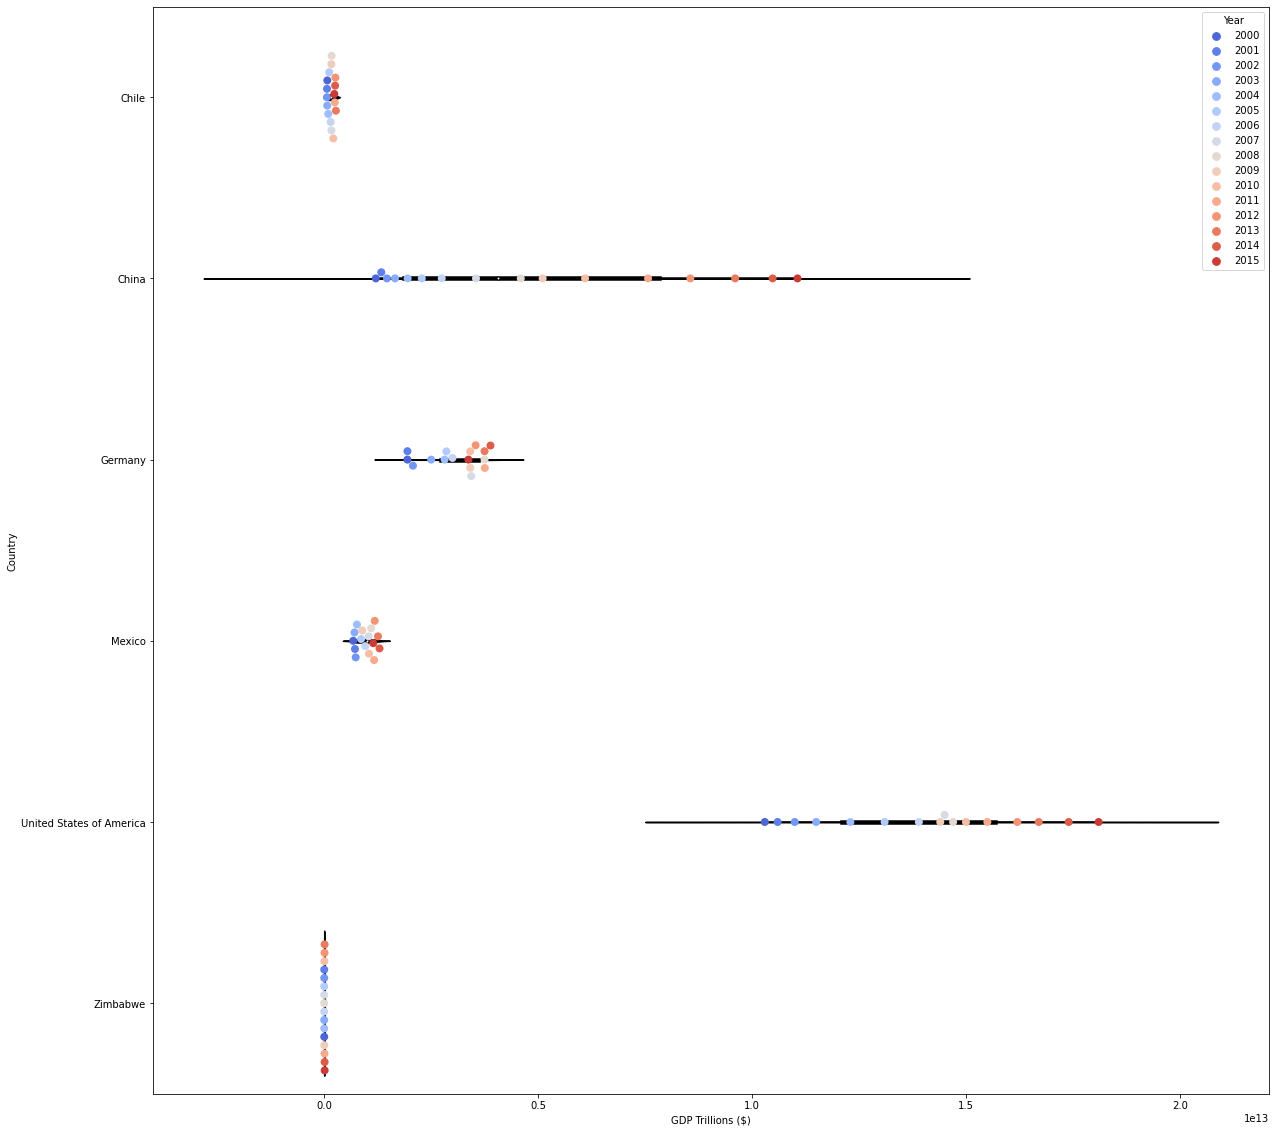

In [26]:
plt.figure(figsize = (20, 20))
sns.violinplot(data = df, x = 'GDP', y = 'Country', color = 'black')
sns.swarmplot(data = df, x = 'GDP', y = 'Country', size = 8, hue = 'Year', palette = 'coolwarm')
plt.xlabel('GDP Trillions ($)')
plt.savefig('ViolinSwarmPlot Hue GDP in Trillion Dollars ($)')
plt.show()

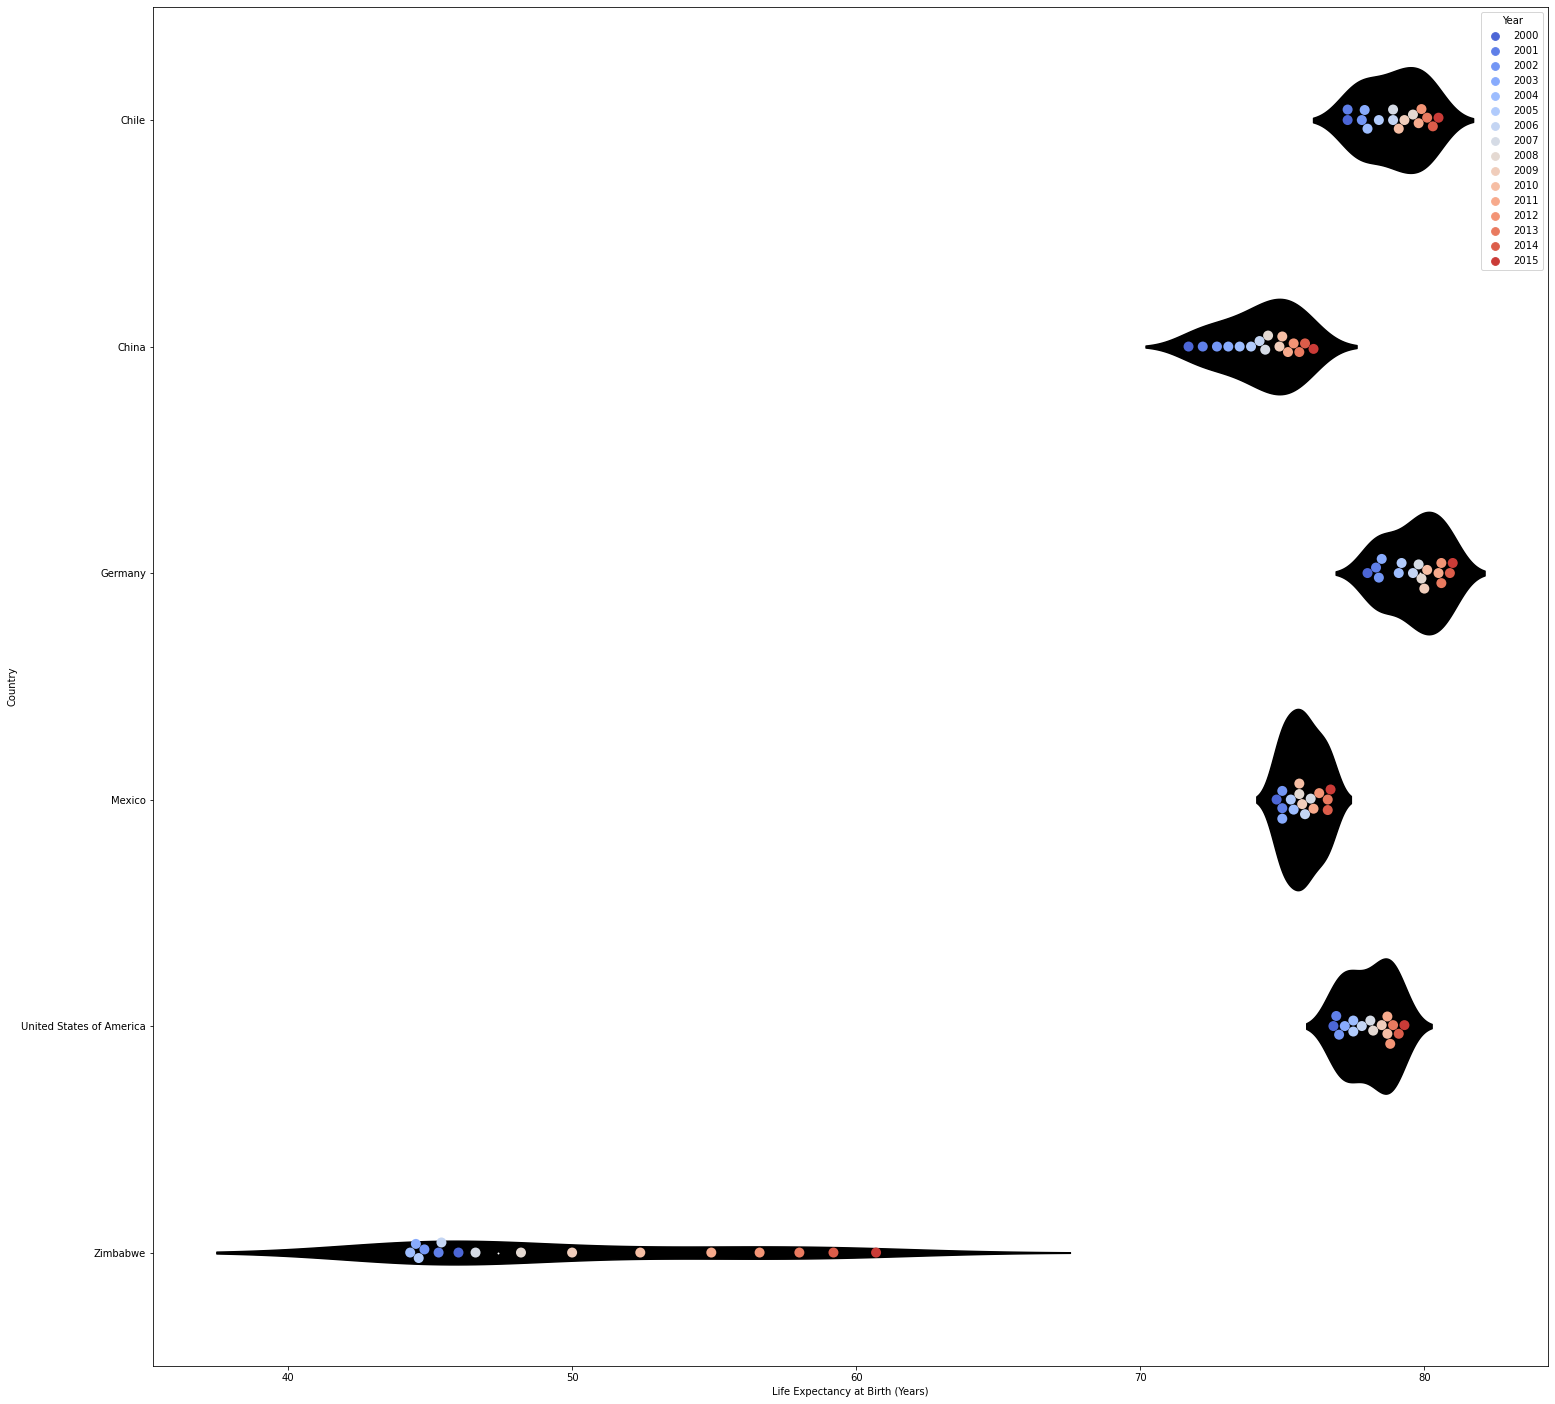

In [27]:
plt.figure(figsize = (25, 25))
sns.violinplot(data = df, x = 'LEBY', y = 'Country', color = 'black')
sns.swarmplot(data = df, x = 'LEBY', y = 'Country', size = 10, hue = 'Year', palette = 'coolwarm')
plt.xlabel('Life Expectancy at Birth (Years)')
plt.savefig('ViolinSwarmPlot Hue Life Expectancy at Birth in Years')
plt.show()

# Summary 3
##### The two plots above have included a hue based on 'Year' which has highlighted that in plot 1 GDP by Trillion Dollars was increased as each year increased except in Zimbabwe where the warmer colours moved away from the mean but did not increase in GDP. In plot 2  Life Expectancy at Birth in Years has increased in each of the years reaching the highest age value in all countires by 2015 which is the latest year of data available and is most notable in Zimbabwe where the biggest increase in Life Expectancy happened but the least impact from GDP. The conclusion I would draw from this visualisation is the poorer countries in GDP terms have the most to gain in terms of Life Expectancy through small improvements to the countries GDP.

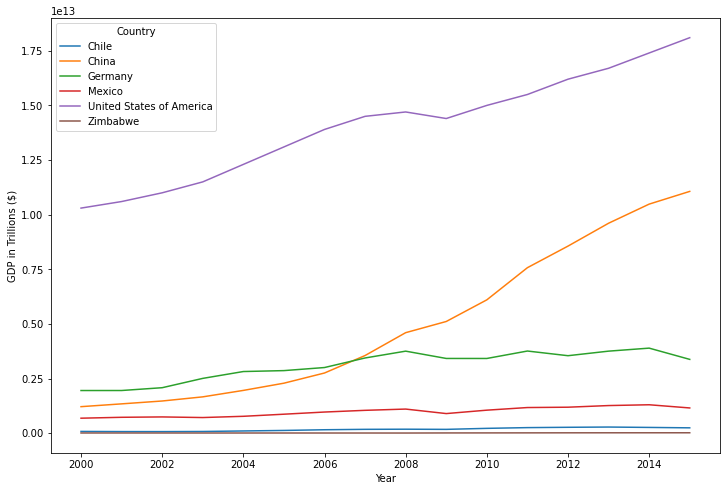

In [39]:
plt.figure(figsize = (12, 8))
sns.lineplot(data = df, x = 'Year', y = 'GDP', hue = 'Country')
plt.ylabel("GDP in Trillions ($)")
plt.show()

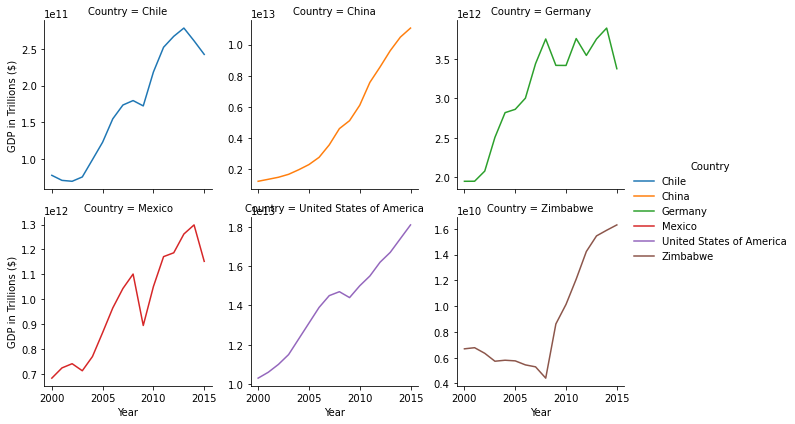

In [33]:
compGDP = sns.FacetGrid(df, col = 'Country', col_wrap = 3, hue = 'Country', sharey = False)
compGDP = (compGDP.map(sns.lineplot, 'Year', 'GDP')
          .add_legend()
          .set_axis_labels('Year', 'GDP in Trillions ($)'))
compGDP;

# Summary 4

##### The plots above really demonstrate the individual line plots of each countries GDP by 'Year' and with a hue of 'Country' we can see dips in GDP for most countries especially around 2008/09 which is likely the result of the financial crisis impact on GDP worldwide. It clearly shows modest growth for all countries but China and the US had much better growth in pure GDP terms compared to all the others.

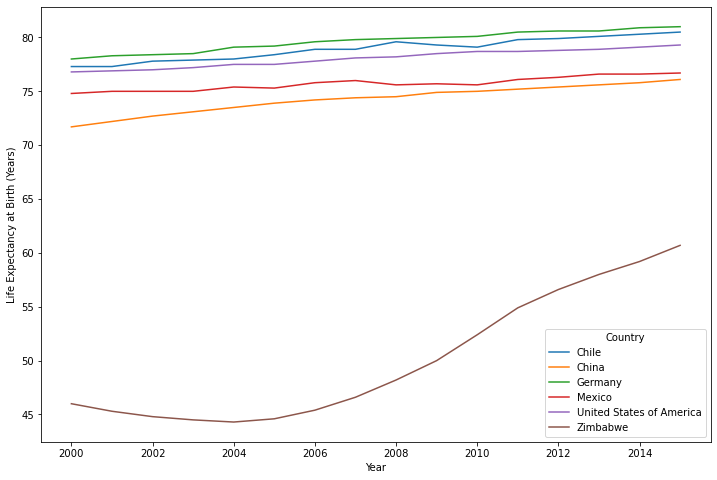

In [28]:
plt.figure(figsize = (12, 8))
sns.lineplot(data = df, x = 'Year', y = 'LEBY', hue = 'Country')
plt.ylabel("Life Expectancy at Birth (Years)")
plt.savefig('Lineplot Life Expectancy at Birth in Years')
plt.show()

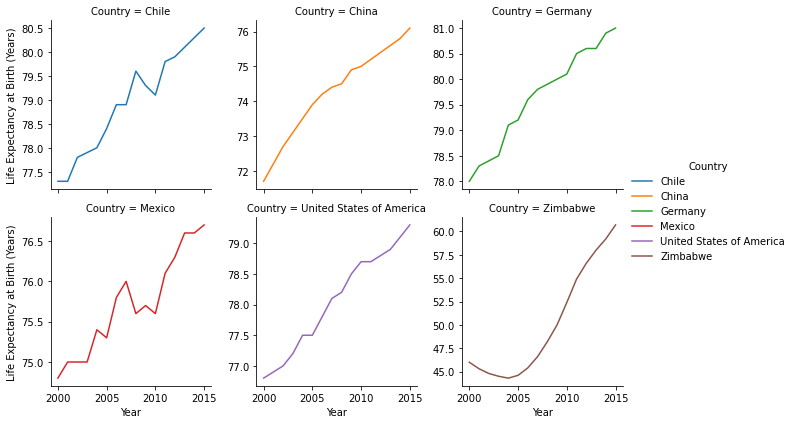

In [35]:
compLEBY = sns.FacetGrid(df, col = 'Country', col_wrap = 3, hue = 'Country', sharey = False)
compLEBY = (compLEBY.map(sns.lineplot, 'Year', 'LEBY')
          .add_legend()
          .set_axis_labels('Year', 'Life Expectancy at Birth (Years)'))
compLEBY;

# Summary 5

##### The plots above have shown improvements in Life Expectancy for all Countries and one interesting observation is how big the dips are in Chile and Mexico so further analysis would need to be carried out to establish potential reasons. Most lineplots indicate a fairly stable linear increase in Life Expectancy but some countries were definitely smoother than others.

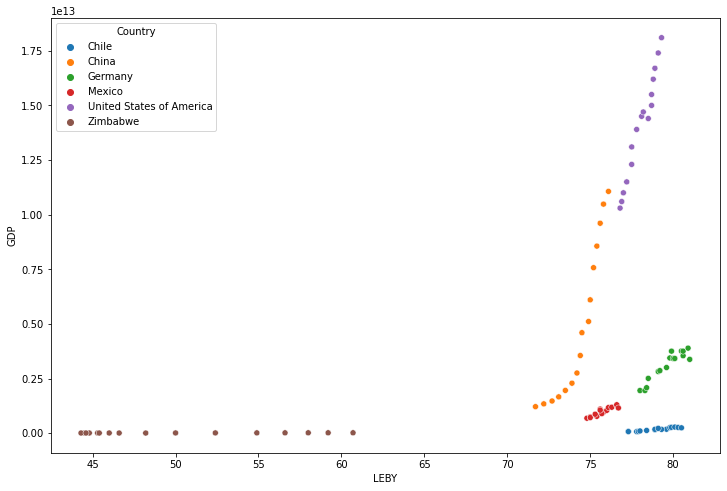

In [30]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = 'LEBY', y = 'GDP', hue = 'Country')
plt.savefig('Scatterplot GDP in Trillion Dollars ($)')
plt.show()

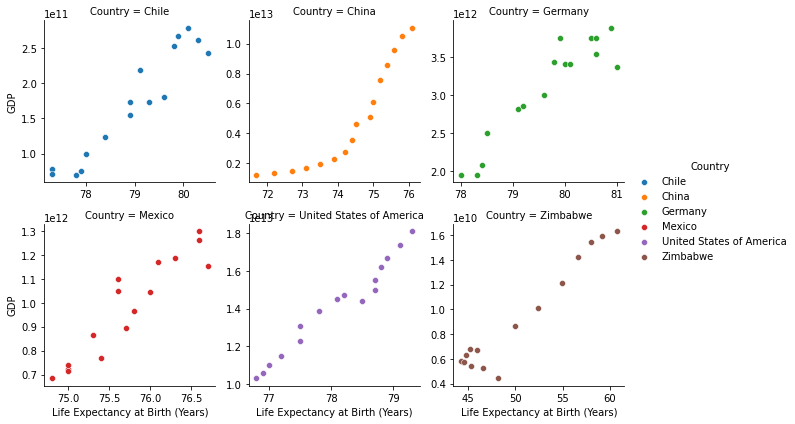

In [42]:
scatt = sns.FacetGrid(data = df, col = 'Country', col_wrap = 3, hue = 'Country', sharey = False, sharex = False)
scatt = (scatt.map(sns.scatterplot, 'LEBY', 'GDP')
        .add_legend()
        .set_axis_labels('Life Expectancy at Birth (Years)'));

# Conclusions

##### Observations made using visualisations of the data.

- Has life expectancy increased over time in the six nations?
    - Life Expectancy has definitely increased in all nations with Zimbabwe having the greatest increase.

- Has GDP increased over time in the six nations?
    - GDP has also increased in all nations over the time of the dataset with China highlighted as the largest increase to GDP.

- Is there a correlation between GDP and life expectancy of a country?
    - We can easily see a positive correlation between GDP and Life Expectancy using the visualisations demonstrated above.

- What is the average life expectancy in these nations?
    - Life Expectancy was around 75 in all countries except Zimbabwe where it was nearer to 50.

- What is the distribution of that life expectancy?
    - Life Expectancy was skewed left for the majority of Countries.